# Kaggle Cats vs. Dogs dataset


The Kaggle Cats vs. Dogs dataset is a classic binary classification dataset in the field of Computer Vision. Comprised of 25,000 labeled images - equally split between cats and dogs - it is used to train machine learning models to distinguish between the two animals based on their features.

However, the dataset poses unique challenges that echo real-world data complexities. Despite the simple premise of categorizing cats and dogs, some images in the dataset contain unexpected elements, such as humans holding cats or multiple animals in one picture. This complexity mimics real-world scenarios, where data is rarely as clean or straightforward as one might hope. These irregularities serve as a reminder of the need for robust data processing and a well-trained model capable of handling unexpected inputs and inconsistencies.
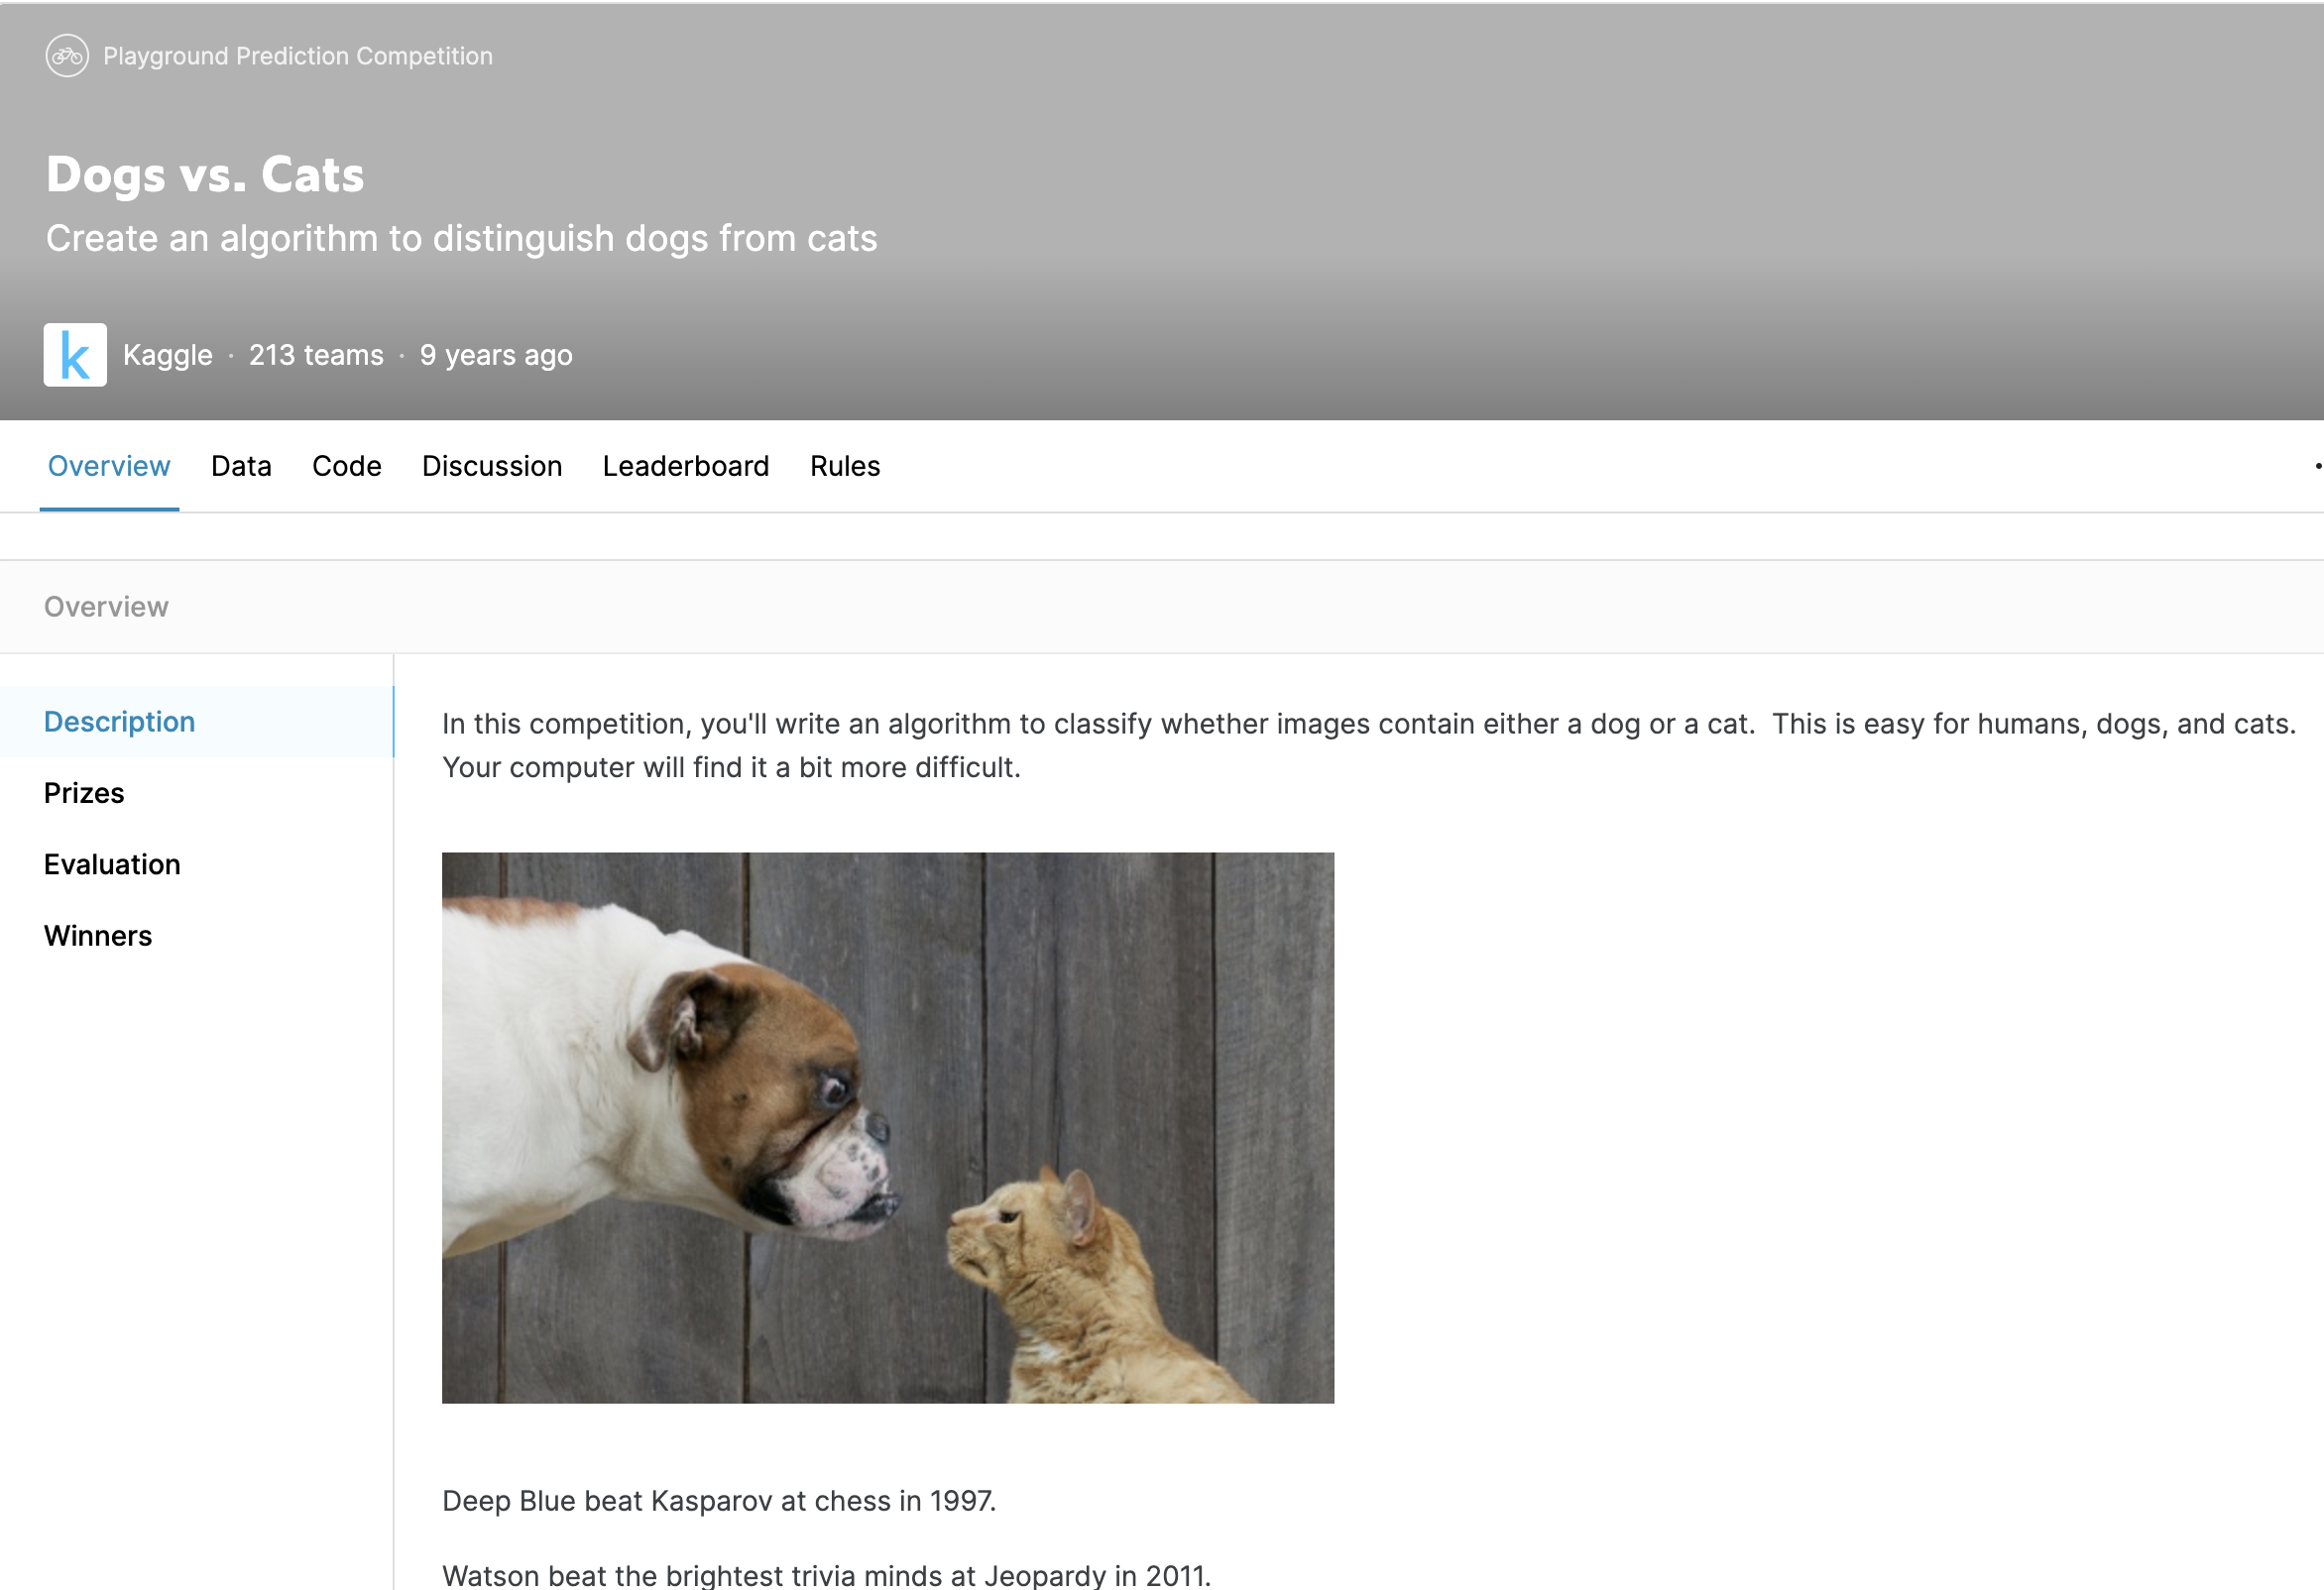


## **Cat vs Dog Image Classification with Convolutional Neural Networks**

This documentation explains the process of classifying images of cats and dogs using Convolutional Neural Networks (CNNs) with the TensorFlow library in Python. The code demonstrates how to handle a real-world image dataset, preprocess it, build a CNN model and evaluate its performance.



In [2]:
# Import libs
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import matplotlib.pyplot as plt

## **Downloading and Preparing the Dataset**

The dataset, retrieved from the Kaggle competition, contains numerous images of cats and dogs. The dataset needs to be downloaded and unzipped into a specified directory.

In [3]:
!wget https://storage.googleapis.com/data-lake-bucket-new/cat-vs-dogs-kaggle.zip

--2023-06-30 08:23:16--  https://storage.googleapis.com/data-lake-bucket-new/cat-vs-dogs-kaggle.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.251.171.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572383158 (546M) [application/x-zip-compressed]
Saving to: ‘cat-vs-dogs-kaggle.zip’

cat-vs-dogs-kaggle. 100%[===================>] 545.87M  13.2MB/s    in 43s     

2023-06-30 08:24:01 (12.7 MB/s) - ‘cat-vs-dogs-kaggle.zip’ saved [572383158/572383158]



In [4]:
!ls -ltr

total 625976
-rw-r--r-- 1 root root  68606236 Mar 28  2018 cats_and_dogs_filtered.zip
-rw-r--r-- 1 root root 572383158 Jun  4 03:53 cat-vs-dogs-kaggle.zip
drwxr-xr-x 1 root root      4096 Jun 28 13:38 sample_data


In [5]:
!pwd

/content


In [6]:
!unzip cat-vs-dogs-kaggle.zip

Streaming output truncated to the last 5000 lines.
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5499.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.55.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.550.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5500.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5501.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5502.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5503.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5504.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5505.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5506.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5507.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5508.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5509.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.551.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5510.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog/dog.5511.jpg  
  inflating: cat-vs-dogs-kaggle/train/dog

## **Preprocessing**

The TensorFlow library offers an efficient way to handle image data through the **`ImageDataGenerator`** class.


The images are rescaled by **`1./255`** to normalize the pixel values between 0 and 1. This is an important step as it generally makes training faster and reduces the chances of getting stuck in local optima.

The method **`flow_from_directory`** is used to load images from the specified directory and automatically label them according to their subdirectories.

## `tensorflow.keras.preprocessing`

ImageDataGenerator, flow_from_directory, and image normalization and resizing of `tensorflow.keras.preprocessing` is some important concepts for working with image data. . Let's break down each one:

## **ImageDataGenerator**:

This is a utility in TensorFlow's Keras API that makes it easy to load, preprocess, and augment image data. It's useful when working with large datasets that don't fit into memory. By using ImageDataGenerator, you can efficiently create batches of images on-the-fly while training a model.

Example:

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
```

## **flow_from_directory**:

This is a method of ImageDataGenerator that allows you to load images directly from a directory structure, and automatically label the images based on the sub-directory in which they are found.

Example:

```python
train_generator = train_datagen.flow_from_directory(
    "path_to_your_training_directory",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
```

## **Rescaling**:

As you described, this is a way to normalize the pixel values of an image. By rescaling the pixel values to a range of 0 to 1, you can help the model converge during training.

## **Resizing**:

Images come in a variety of sizes. However, the input to a neural network needs to be a fixed size. As such, it's common to resize all images to a fixed size so they can be input to the network.

In the context of a binary classification problem, like distinguishing between horses and humans, these tools are very handy. They allow you to prepare your image data for training a model with relative ease.




Images are resized to 150x150 pixels to ensure uniformity. The batch_size is set to 20, meaning the model will take 20 images at a time during training. The class_mode is set to 'binary' as the problem at hand is a binary classification problem (cat or dog).

In [7]:
# Define directories
train_dir = '/content/cat-vs-dogs-kaggle/train/'
test_dir = '/content/cat-vs-dogs-kaggle/test/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_cross entropy loss, we need binary labels
    class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 24000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## **Building the CNN Model**

The model is constructed using a sequential model architecture.

The model uses Conv2D layers (Convolutional Layers) and MaxPooling2D layers (Pooling Layers). Conv2D layers are like a set of learnable filters. Here, each filter transforms a part of the image (defined by the kernel size) into a smaller pixel value using the RELU activation function.

MaxPooling2D is then used to reduce spatial dimensions (height & width). It’s like a downsampling filter that looks at 2x2 pixels and picks the maximum value. This significantly reduces the computational cost by reducing the number of parameters.

The output of the Conv2D and MaxPooling2D layers are flattened to a single 1D vector, which then passes through a Dense layer (a neural network layer where each input node is connected to each output node), with 512 nodes. The output layer has only one node which gives a binary output (cat or dog).

In [8]:
# Model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

A glance at the model summary shows the architecture of our model, the shape of the output of each layer, and the number of parameters (trainable and non-trainable).

One thing to note here is that the first Conv2D layer has an output shape of **`(None, 148, 148, 16)`**. This is because the 3x3 filter takes a stride of 1 pixel at a time and it cannot move 1 stride further when it is at the border of the image. Hence, after applying a 3x3 filter to our 150x150 image, the size decreases by 2 pixels, making it 148x148.

The model is then compiled with RMSprop optimizer, binary cross entropy as loss (since this is a binary classification problem), and accuracy as a metric.

The model is then trained on the training data with a specified number of epochs, and validated on the validation data. The training time is also calculated.

Finally, the model performance (loss and accuracy) is evaluated on the validation data, the model is saved, and the training and validation accuracy and loss are plotted against epochs.

## **Model Compilation**

After defining the model architecture, the next step is to compile the model.

Here, we are using the RMSprop optimization algorithm with a learning rate of 0.001. The optimizer adjusts the parameters of the model to minimize the loss function. RMSprop is an adaptive learning rate optimization algorithm which speeds up gradient descent.

The loss function is set to 'binary_crossentropy'. This is a suitable choice as we are solving a binary classification problem. It measures the "distance" between the ground-truth distribution and the predictions.

The 'accuracy' metric is used to evaluate the performance of the model. Accuracy is the ratio of correctly predicted instances to the total instances in the dataset.

In [9]:
model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## **Model Training**

The model is trained using the **`model.fit`** method, which is a standard method for training models in Keras.

Here, we train the model for 15 epochs, meaning the model will see each image in the training dataset 15 times. The training and validation datasets are generated using the train and test image data generators created earlier. The 'verbose' argument is set to 1 which will display a progress bar for the training process. The model's training time is also tracked.

In [10]:
start_time = time.time()
print(f'\nMODEL TRAINING:')
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=1
)
print(f"DNN training time: {time.time() - start_time} seconds")


MODEL TRAINING:
Epoch 1/15
1200/1200 [==============================] - 101s 76ms/step - loss: 0.5691 - accuracy: 0.7025 - val_loss: 0.4441 - val_accuracy: 0.7890
Epoch 2/15
1200/1200 [==============================] - 87s 73ms/step - loss: 0.4394 - accuracy: 0.7981 - val_loss: 0.4591 - val_accuracy: 0.7900
Epoch 3/15
1200/1200 [==============================] - 90s 75ms/step - loss: 0.3930 - accuracy: 0.8287 - val_loss: 0.3770 - val_accuracy: 0.8240
Epoch 4/15
1200/1200 [==============================] - 86s 72ms/step - loss: 0.3535 - accuracy: 0.8490 - val_loss: 0.4462 - val_accuracy: 0.8160
Epoch 5/15
1200/1200 [==============================] - 88s 74ms/step - loss: 0.3298 - accuracy: 0.8630 - val_loss: 0.3901 - val_accuracy: 0.8190
Epoch 6/15
1200/1200 [==============================] - 88s 73ms/step - loss: 0.3104 - accuracy: 0.8739 - val_loss: 0.3900 - val_accuracy: 0.8420
Epoch 7/15
1200/1200 [==============================] - 92s 76ms/step - loss: 0.3015 - accuracy: 0.8803 - 

## **Model Evaluation**

After the model is trained, it's important to evaluate its performance on the validation set.

Here, model.evaluate is used to evaluate the performance of the model on the validation set. It returns the loss value and metrics values for the model. In this case, the loss is 'binary_crossentropy' and the metric is 'accuracy'.

In [11]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

50/50 [==============================] - 3s 60ms/step - loss: 0.4096 - accuracy: 0.8320
Validation Loss: 0.4096004366874695
Validation Accuracy: 0.8320000171661377


## **Saving the Model**

The trained model is then saved for future use.

In [13]:
# Save Model
model.save('cat-dog-model.keras', save_format='tf')

## **Visualizing Training History**

Lastly, we plot the training and validation accuracy and loss over the training period. This helps in understanding how our model learned over time and if any overfitting or underfitting occurred.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


## Save the model to Google Drive

In [14]:
# First, mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Save the model to Google Drive
model_path = "/content/drive/My Drive/cat-dog-model.keras"
model.save(model_path, save_format='tf')

Mounted at /content/drive


## Load the model back from Drive

In [15]:
# To load the model
model_path = "/content/drive/My Drive/cat-dog-model.keras"
loaded_model = tf.keras.models.load_model(model_path)

## Load and preprocess New Images

In [16]:
# To predict new images, we first need to load and preprocess them
from tensorflow.keras.preprocessing import image
import numpy as np

def load_image(img_path, size=(150, 150)):
    img = image.load_img(img_path, target_size=size)  # Load image
    img_tensor = image.img_to_array(img)  # Convert to array
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Reshape
    img_tensor /= 255.  # Normalize [0,1]
    return img_tensor

## Model Inference

In [18]:
# Upload new images to Jupyter notebook using Colab's upload function
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img_tensor = load_image(path)
    prediction = loaded_model.predict(img_tensor)
    if prediction < 0.5:
        print(fn + " is a cat")
    else:
        print(fn + " is a dog")

Saving Screenshot 2023-06-30 at 2.54.42 PM.png to Screenshot 2023-06-30 at 2.54.42 PM.png
1/1 [==============================] - 0s 20ms/step
Screenshot 2023-06-30 at 2.54.42 PM.png is a cat
